# Basic wrangling, consistency checks, cleaning
1. Drop unnecessary columns
2. Adjust data types 
3. Check for mixed type columns 
4. Check for duplicates
5. Check for missing values 
6. Check for inconsistencies, outliers 

In [155]:
# Import libraries
import pandas as pd
import numpy as np
import os

In [156]:
# Import data set
listing=pd.read_csv(r'/Users/OldBobJulia/Desktop/CF/Course/6. Advanced Analytics and Dashboard Design/Berlin Airbnb Analysis/02 Data/Original data/listings.csv')

In [157]:
# Basic checksΩΩΩΩΩ
listing.shape

(19095, 16)

In [158]:
listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54433,13.39761,Private room,28,60,18,2018-11-11,0.21,3,101
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,74,90,141,2020-04-03,2.20,6,357
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,2017-03-20,1.14,1,254
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29,7,27,2018-08-16,0.28,1,285
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51163,13.45289,Entire home/apt,79,7,135,2021-01-02,1.02,1,0


In [159]:
listing.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19090,50972604,Enjoy Berlin at the best place !,79948380,Ricardo,Mitte,Parkviertel,52.548600,13.351634,Entire home/apt,90,2,0,NaN,NaN,1,117
19091,50977125,Zentrale 2-Zimmerwohnung in Berlin,63062620,Jonas,Tempelhof - Schöneberg,Schöneberg-Nord,52.501473,13.354805,Entire home/apt,78,2,0,NaN,NaN,1,67
19092,50982452,Beautiful room in spacious Neukölln flat,7517055,Laura,Neukölln,Neuköllner Mitte/Zentrum,52.480657,13.427291,Private room,35,3,0,NaN,NaN,2,1
19093,50982997,Central in the capital berlin,76282923,Zarina,Mitte,Alexanderplatz,52.527802,13.408350,Private room,49,16,0,NaN,NaN,1,25
19094,50983374,Studio Komfort für Zwei,71613847,Anne,Treptow - Köpenick,Oberschöneweide,52.461278,13.518873,Entire home/apt,74,2,0,NaN,NaN,5,365


In [160]:
# Check data types
listing.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [161]:
# I change id, host_id to object to excl. from describe
listing['id'] = listing['id'].astype('str')
listing['host_id'] = listing['host_id'].astype('str')

In [162]:
listing.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

I cannot change last_review to int64 bc it incl. NaN.

In [163]:
# Check for duplicates
print(listing.duplicated().sum())

0


There are no duplicates

In [164]:
# Check for missing data
listing.isnull().sum()

id                                   0
name                                30
host_id                              0
host_name                           12
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4155
reviews_per_month                 4155
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Missing values in name or host name are not relevant to the results. 
The number of missing reviews is high, I will investigate further.

In [165]:
# Create subset to check NaN in last_review
listing_last_review_nan = listing.loc[listing['last_review'].isnull() == True]

In [166]:
listing_last_review_nan.shape

(4155, 16)

In [167]:
listing_last_review_nan.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
64,116057,Apartment near Kudamm (WLAN / WiFi),586511,Thomas,Charlottenburg-Wilm.,Düsseldorfer Straße,52.49215,13.29605,Entire home/apt,86,3,0,NaN,NaN,1,363
110,193601,"Well located, cozy 2 rooms apartment, all clos...",939230,Nana M,Pankow,Pankow Süd,52.55527,13.42104,Entire home/apt,75,3,0,NaN,NaN,1,0
119,200125,TOP apartment in art nouveau villa,977942,Rainer,Steglitz - Zehlendorf,Zehlendorf Nord,52.43704,13.22343,Entire home/apt,89,60,0,NaN,NaN,1,365
124,208495,CENTRAL VINTAGE-MODERN FLAT,965569,Coco,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51399,13.46324,Entire home/apt,150,2,0,NaN,NaN,1,0
153,242908,Holiday Apartment in Berlin Wannsee with balcony,1275359,Henning,Steglitz - Zehlendorf,Zehlendorf Südwest,52.41643,13.16445,Entire home/apt,95,5,0,NaN,NaN,3,267


4155 is a high number out of 19095 to lack reviews. 
I will leave it bc it will not influence the price or location analysis, and it might be something interesting to include in the analysis. 

In [168]:
# Check for mixed data type columns
for col in listing.columns.tolist():
  weird = (listing[[col]].applymap(type) != listing[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (listing[weird]) > 0:
    print (col)


name
host_name
last_review


In [169]:
# Check which dtype prevails
listing.dtypes.value_counts(dropna=False)

object     8
int64      5
float64    3
dtype: int64

In [170]:
listing.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

The problem here is that the columns containing NaN are mixed type, because NaN is always float64. Since I already decided I will keep NaN as they are, I will convert them to "missing" or "0" to make column dtypes consistent. 

In [171]:
# Replace Nan with missing
listing['name'].fillna('missing', inplace=True)

In [172]:
# Check
listing['name'].value_counts(dropna=False)

missing                                               30
Deluxe Apartment in Berlin Mitte                      20
Cosy Double Room in Berlin Weissensee                 15
Deluxe Studio in Berlin Mitte                          9
Amazing Studio Apartment in Berlin Mitte               6
                                                      ..
TOP Furnished Room in Graefekiez                       1
3 BR 6stations to Alex+Self CheckIn+Street Parking     1
Nice Room in a beautiful flat in Neukölln              1
Ideal for families! Townhouse in centre Berlin         1
Central Stylish Sweet Apartment                        1
Name: name, Length: 18546, dtype: int64

In [173]:
# Assign str to column name
listing['name'] = listing['name'].astype('str')

In [174]:
# Check again for mixed type columns
for col in listing.columns.tolist():
  weird = (listing[[col]].applymap(type) != listing[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (listing[weird]) > 0:
    print (col)

host_name
last_review


In [175]:
# Do the same for host_name
listing['host_name'].fillna('missing', inplace=True)

In [176]:
listing['host_name'] = listing['host_name'].astype('str')

In [177]:
listing['host_name'].value_counts(dropna=False)

Anna             145
Michael          142
Julia            135
David            129
Baharbin         126
                ... 
Jan Benjamin       1
Arthur&Marina      1
May                1
Charalambos        1
Petr               1
Name: host_name, Length: 5342, dtype: int64

In [178]:
# Check again for mixed type columns
for col in listing.columns.tolist():
  weird = (listing[[col]].applymap(type) != listing[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (listing[weird]) > 0:
    print (col)

last_review


In [179]:
# Replace numpy Nan in last_review with 0 so that it can become int64 and be included in describe
listing['last_review'] = pd.to_numeric(
    listing['last_review'], 
    errors='coerce'
).fillna(0).astype('int')

In [180]:
# Check again for mixed type columns
for col in listing.columns.tolist():
  weird = (listing[[col]].applymap(type) != listing[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (listing[weird]) > 0:
    print (col)

There are no more mixed type columns

In [181]:
# Check dtypes again
listing.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                         int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [182]:
# General check
listing.shape

(19095, 16)

In [183]:
listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54433,13.39761,Private room,28,60,18,0,0.21,3,101
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,74,90,141,0,2.20,6,357
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,0,1.14,1,254
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29,7,27,0,0.28,1,285
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51163,13.45289,Entire home/apt,79,7,135,0,1.02,1,0


In [184]:
# Check summary stats
listing.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,19095.000000,19095.000000,19095.000000,19095.000000,19095.000000,19095.0,14940.000000,19095.000000,19095.000000
mean,52.510215,13.404654,73.303221,9.105944,21.637078,0.0,0.718274,3.135847,91.271694
std,0.032391,0.062953,136.249622,33.635956,48.670427,0.0,1.445272,7.773246,127.645330
min,52.340070,13.097150,0.000000,1.000000,0.000000,0.0,0.010000,1.000000,0.000000
25%,52.489710,13.367160,35.000000,2.000000,1.000000,0.0,0.090000,1.000000,0.000000
50%,52.509950,13.414090,52.000000,3.000000,4.000000,0.0,0.270000,1.000000,0.000000
75%,52.533320,13.438900,81.000000,5.000000,17.000000,0.0,0.830000,2.000000,175.000000
max,52.656110,13.757370,8000.000000,1124.000000,620.000000,0.0,94.350000,76.000000,365.000000


Need to check:
A. price min 0.0, max 8000
B. min. nights 1124
C. last review is now all 0.0
D. host listings count max. 76
E. double check availability counts

In [239]:
# Create path to export for report
path = r'/Users/OldBobJulia/Desktop/CF/Course/6. Advanced Analytics and Dashboard Design/Berlin Airbnb Analysis'

In [241]:
# Export describe
listing.describe().to_csv(os.path.join(path, '01 Project management', 'describe_before.csv'))

In [185]:
# Check C, modify dtype
listing['last_review'] = listing['last_review'].astype('str')

In [186]:
listing.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [187]:
listing.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19095.000000,19095.000000,19095.000000,19095.000000,19095.000000,14940.000000,19095.000000,19095.000000
mean,52.510215,13.404654,73.303221,9.105944,21.637078,0.718274,3.135847,91.271694
std,0.032391,0.062953,136.249622,33.635956,48.670427,1.445272,7.773246,127.645330
min,52.340070,13.097150,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,52.489710,13.367160,35.000000,2.000000,1.000000,0.090000,1.000000,0.000000
50%,52.509950,13.414090,52.000000,3.000000,4.000000,0.270000,1.000000,0.000000
75%,52.533320,13.438900,81.000000,5.000000,17.000000,0.830000,2.000000,175.000000
max,52.656110,13.757370,8000.000000,1124.000000,620.000000,94.350000,76.000000,365.000000


In [188]:
listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54433,13.39761,Private room,28,60,18,0,0.21,3,101
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,74,90,141,0,2.20,6,357
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90,62,147,0,1.14,1,254
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29,7,27,0,0.28,1,285
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51163,13.45289,Entire home/apt,79,7,135,0,1.02,1,0


Solution C: last_reviews was a datetime column in the beginning, so when replacing NaN with 0 it replaced all rows. This column already came in as all NaN. Will leave it for now. 

In [189]:
# Check A, make subset of price
price = listing['price']

In [190]:
# Check value counts
price.value_counts(dropna=False)

50      945
40      886
35      807
30      804
45      686
       ... 
1450      1
499       1
419       1
339       1
479       1
Name: price, Length: 406, dtype: int64

In [196]:
listing.value_counts(listing.price == '0').count()

1

In [192]:
# Create subset of price = 0 
listing_0 = listing.loc[listing['price'] == 0]

In [193]:
listing_0.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
15857,42279207,Classik Hotel Hackescher Markt,273509888,Classik Hotel Hackescher Markt,Mitte,Alexanderplatz,52.52322,13.40129,Hotel room,0,1,10,0,0.45,1,0
16011,42583346,Hotel Delta am Potsdamer Platz,316070228,Hotel Delta Am Potsdamer Platz,Mitte,Tiergarten Süd,52.50120,13.36287,Hotel room,0,1,0,0,NaN,1,0
16081,42687506,Pentahotel Berlin-Köpenick,304236789,Pentahotel,Treptow - Köpenick,Kölln. Vorstadt/Spindlersf.,52.44397,13.56972,Hotel room,0,1,0,0,NaN,1,0
16331,43247575,aletto Hotel Kudamm,312172749,Aletto Hotel Kudamm,Charlottenburg-Wilm.,Otto-Suhr-Allee,52.50658,13.32935,Hotel room,0,1,0,0,NaN,1,0
17332,45693213,Max Brown Hotel Ku'Damm,370237375,Sircle,Charlottenburg-Wilm.,Düsseldorfer Straße,52.49691,13.32385,Hotel room,0,1,0,0,NaN,1,0


In [195]:
listing_0.shape

(7, 16)

Though statistically the price 0 is not an outlier, it's unlikely the correct price for a room is "0". I will impute the median, 73,30.

In [201]:
# Impute 0 values in price with mean
listing['price']=listing['price'].replace(0,listing['price'].mean())

In [202]:
# Check
listing_0_2 = listing.loc[listing['price'] == 0]

In [203]:
listing_0_2.shape

(0, 16)

In [205]:
# Double check
listing.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19095.000000,19095.000000,19095.000000,19095.000000,19095.000000,14940.000000,19095.000000,19095.000000
mean,52.510215,13.404654,73.330093,9.105944,21.637078,0.718274,3.135847,91.271694
std,0.032391,0.062953,136.242390,33.635956,48.670427,1.445272,7.773246,127.645330
min,52.340070,13.097150,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,52.489710,13.367160,35.000000,2.000000,1.000000,0.090000,1.000000,0.000000
50%,52.509950,13.414090,52.000000,3.000000,4.000000,0.270000,1.000000,0.000000
75%,52.533320,13.438900,81.000000,5.000000,17.000000,0.830000,2.000000,175.000000
max,52.656110,13.757370,8000.000000,1124.000000,620.000000,94.350000,76.000000,365.000000


In [206]:
# Double check A. max price 8000
listing.value_counts(listing.price == '0').count()

1

In [148]:
# Check this specific row
listing_8000 = listing.loc[listing['price'] == 8000]

In [150]:
listing_8000.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
16001,42555922,Modern private room in large Altbau apartment,232488947,Chris,Pankow,Prenzlauer Berg Nordwest,52.55126,13.41251,Private room,8000,3,0,0.0,NaN,1,364
16301,43124241,柏林gongyu,215660541,Yuchen,Mitte,Moabit Ost,52.52591,13.34745,Entire home/apt,8000,1,0,0.0,NaN,1,56
17148,45274790,Cozy room in Berlin,361836933,Denna,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,52.48868,13.39500,Private room,8000,2,0,0.0,NaN,2,89


In [207]:
listing_8000.shape

(3, 16)

Statistically, the price of 8000 is an outlier. However, this city rental prices as crazy as they are, and we have no info on the sqm2 of the rooms, they might just be correct. 

In [213]:
# Import additional libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

<AxesSubplot:ylabel='Frequency'>

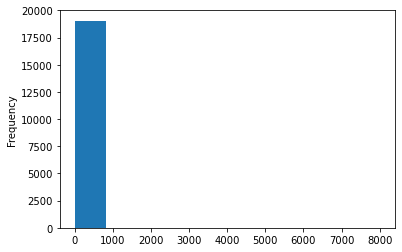

In [222]:
# Create histogram to check distributions
listing['price'].plot.hist(bins = 10)

<AxesSubplot:xlabel='price', ylabel='price'>

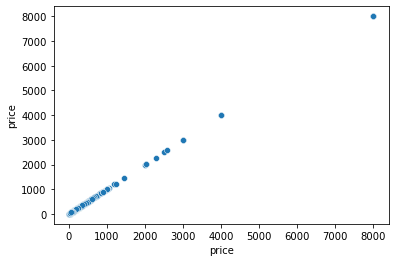

In [219]:
# Create scatterplot of prices
sns.scatterplot(x = 'price', y = 'price',data = listing)

In [223]:
# Check B. min nights column has a max of 1124. Check for all min. nights over 365. 
listing_min_nights = listing.loc[listing['minimum_nights'] > 365]


In [224]:
listing_min_nights.shape

(13, 16)

In [225]:
listing_min_nights.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
361,584757,Nice room trendy Prenzlauberg,2881484,Daniel,Pankow,Prenzlauer Berg Nordwest,52.55438,13.40816,Private room,20.0,1000,26,0,0.24,1,365
638,1106372,Cozy&Central: Bergmann St-Kreuzberg,6074400,Eliav,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,52.48918,13.39042,Entire home/apt,59.0,1100,115,0,1.21,1,0
846,1617037,Audrey & Friedrichshain,8605064,Francisca,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.50730,13.46610,Entire home/apt,69.0,1124,113,0,1.19,1,364
1660,4003140,"85m² flat near by ""Humboldthain""",5781298,Paul,Mitte,Brunnenstr. Nord,52.54448,13.37860,Private room,70.0,500,12,0,0.32,1,365
2573,6670861,"Schillerkiez, cute and bright.",34914724,François,Neukölln,Schillerpromenade,52.47490,13.42182,Entire home/apt,35.0,1124,14,0,0.19,1,365


Solution B: Quick research shows it is possible to rent Airbnb for over 1 year. I will leave these values as they are. 

In [229]:
# Check D. calculated_host_listings_count max. is 76
listing_host_listing = listing.loc[listing['calculated_host_listings_count'] > 20]

In [230]:
listing_host_listing.shape

(583, 16)

In [231]:
listing_host_listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
203,265354,Nice apartment in Berlin,1391772,Sunflower Hostel,Friedrichshain-Kreuzberg,Karl-Marx-Allee-Süd,52.50977,13.44602,Private room,123.0,1,48,0,0.71,26,293
204,265389,Beautiful single room in Berlin,1391772,Sunflower Hostel,Friedrichshain-Kreuzberg,Karl-Marx-Allee-Süd,52.50977,13.44602,Private room,50.0,1,7,0,0.10,26,34
205,265394,Stylish double room in Berlin,1391772,Sunflower Hostel,Friedrichshain-Kreuzberg,Karl-Marx-Allee-Süd,52.50977,13.44602,Private room,64.0,1,43,0,0.76,26,315
206,265402,Nice room for 3 persons,1391772,Sunflower Hostel,Friedrichshain-Kreuzberg,Karl-Marx-Allee-Süd,52.50977,13.44602,Shared room,27.0,1,49,0,0.64,26,293
207,265408,Elegant 4-bed room in Berlin,1391772,Sunflower Hostel,Friedrichshain-Kreuzberg,Karl-Marx-Allee-Süd,52.50977,13.44602,Shared room,45.0,1,17,0,0.20,26,324


In [232]:
listing_host_listing.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18766,50463764,Cozy & bright suite with own bathroom,403858404,Baharbin,Tempelhof - Schöneberg,Schöneberg-Nord,52.49485,13.36137,Private room,83.0,2,0,0,NaN,50,365
18767,50463890,Bright & comfy suite with own bathroom,403858404,Baharbin,Tempelhof - Schöneberg,Schöneberg-Nord,52.49306,13.36125,Private room,83.0,2,0,0,NaN,50,365
18768,50464006,Spacious & bright suite with own bathroom,403858404,Baharbin,Tempelhof - Schöneberg,Schöneberg-Nord,52.49423,13.35959,Private room,83.0,2,0,0,NaN,50,365
18904,50685439,Deluxe Apartment in Berlin Mitte,378071271,Flo,Mitte,Alexanderplatz,52.50553,13.41510,Entire home/apt,78.0,1,0,0,NaN,38,337
18905,50685440,Deluxe Apartment in Berlin Mitte,378071271,Flo,Mitte,Alexanderplatz,52.50682,13.41474,Entire home/apt,78.0,1,0,0,NaN,38,320


It looks as though hosts with over 20 calculated listings (outliers) are HOSTELS renting each room individually or ROOM ADMINISTRATORS who manage bookings for several different rooms. I will leave the values as they are, as I think they're correct

In [233]:
# Check E. availability counts 
listing['availability_365'].value_counts(dropna = False)

0      9584
365     354
193     170
364     145
89      144
       ... 
199       4
99        4
211       4
201       3
216       3
Name: availability_365, Length: 366, dtype: int64

Availability of most listings is currently 0. The logical explanation for that is the huge slump in tourism due to Covid-19 but also recent crackdowns on illegal short term rentals in Berlin. 

In [234]:
# Final checks
listing.shape

(19095, 16)

In [235]:
listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54433,13.39761,Private room,28.0,60,18,0,0.21,3,101
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,74.0,90,141,0,2.20,6,357
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90.0,62,147,0,1.14,1,254
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29.0,7,27,0,0.28,1,285
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51163,13.45289,Entire home/apt,79.0,7,135,0,1.02,1,0


In [236]:
listing.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19095.000000,19095.000000,19095.000000,19095.000000,19095.000000,14940.000000,19095.000000,19095.000000
mean,52.510215,13.404654,73.330093,9.105944,21.637078,0.718274,3.135847,91.271694
std,0.032391,0.062953,136.242390,33.635956,48.670427,1.445272,7.773246,127.645330
min,52.340070,13.097150,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,52.489710,13.367160,35.000000,2.000000,1.000000,0.090000,1.000000,0.000000
50%,52.509950,13.414090,52.000000,3.000000,4.000000,0.270000,1.000000,0.000000
75%,52.533320,13.438900,81.000000,5.000000,17.000000,0.830000,2.000000,175.000000
max,52.656110,13.757370,8000.000000,1124.000000,620.000000,94.350000,76.000000,365.000000


In [242]:
# Export describe after cleaning
listing.describe().to_csv(os.path.join(path, '01 Project management', 'describe_after.csv'))

In [243]:
# Export data set 
listing.to_csv(os.path.join(path, '02 Data','Prepared Data', 'listing_wrangled_cleaned.csv'))